# Trabajo Práctico Módulo 1 - Análisis Básicos

## Exploración Preliminar y Gráficos
 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import random


In [2]:
data0 = np.loadtxt('tiempos.txt', skiprows=1)
data = np.loadtxt('tiemposCorregidos.txt', skiprows=1)

#### Series de tiempo (Figura 1)

In [3]:
print(data0)

[[   1.    11.1   11.3   19.4]
 [   2.    13.    12.8   18.2]
 [   3.    16.1   16.    19. ]
 [   4.    14.5   14.1   18.9]
 [   5.    12.    12.5   19.1]
 [   6.    11.    11.6   18.7]
 [   7.    15.1   14.6  189. ]
 [   8.    14.4   14.2   19.9]
 [   9.    16.1   16.1   18.5]
 [  10.    17.    16.7   19.2]
 [  11.    12.2   12.4   18.8]
 [  12.    14.4   14.1   19.2]]


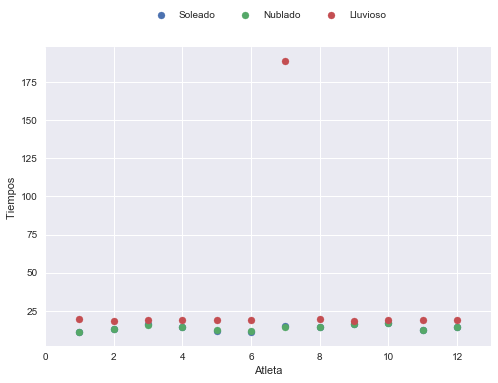

In [4]:
plt.figure()
plt.scatter(data0[:,0], data0[:,1],label = "Soleado")
plt.scatter(data0[:,0], data0[:,2],label = "Nublado")
plt.scatter(data0[:,0], data0[:,3],label = "Lluvioso")
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('Atleta')
plt.ylabel('Tiempos ')
plt.xlim(0,13)
plt.savefig("Datos0", dpi = 300)
plt.show()
plt.close()   # Terminar un gráfico

#### Series de tiempo depurada (Figura 2)

In [5]:
print(data)

[[  1.   11.1  11.3  19.4]
 [  2.   13.   12.8  18.2]
 [  3.   16.1  16.   19. ]
 [  4.   14.5  14.1  18.9]
 [  5.   12.   12.5  19.1]
 [  6.   11.   11.6  18.7]
 [  7.   15.1  14.6  18.9]
 [  8.   14.4  14.2  19.9]
 [  9.   16.1  16.1  18.5]
 [ 10.   17.   16.7  19.2]
 [ 11.   12.2  12.4  18.8]
 [ 12.   14.4  14.1  19.2]]


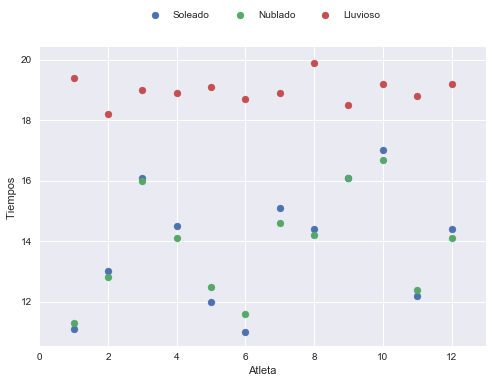

In [6]:
plt.figure()
plt.scatter(data[:,0], data[:,1],label = "Soleado")
plt.scatter(data[:,0], data[:,2],label = "Nublado")
plt.scatter(data[:,0], data[:,3],label = "Lluvioso")
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=6)
plt.xlabel('Atleta')
plt.ylabel('Tiempos ')
plt.xlim(0,13)
plt.savefig("Datos", dpi = 300)
plt.show()
plt.close()   # Terminar un gráfico


### Estudio de distribución de las series

In [7]:
tiempos_sol = data[:,1] 
tiempos_nub = data[:,2]
tiempos_llu = data[:,3]
tituloEstadistico = ["Serie", "Estadistico", "p-valor"]

def graficarTabla(test, titulo, datos):
    print("Test de ", test)
    print("{:20} | {:20} | {:20}".format(titulo[0], titulo[1], titulo[2]))
    for serie, res in datos.items():
        print("{:20} | {:20} | {:20}".format(serie, res[0],  res[1]))


#### Test de  Shapiro (Tabla 1)

In [8]:
testShapiro = {}
testShapiro["Soleado"] = stats.shapiro(tiempos_sol)
testShapiro["Nublado"] = stats.shapiro(tiempos_nub)
testShapiro["Lluvioso"] = stats.shapiro(tiempos_llu)
graficarTabla("Shapiro", tituloEstadistico, testShapiro)


Test de  Shapiro
Serie                | Estadistico          | p-valor             
Soleado              |   0.9382140636444092 |  0.47528842091560364
Nublado              |   0.9423919916152954 |   0.5296684503555298
Lluvioso             |    0.978437602519989 |   0.9766601324081421


#### Histogramas de frecuencia (Figura 3)

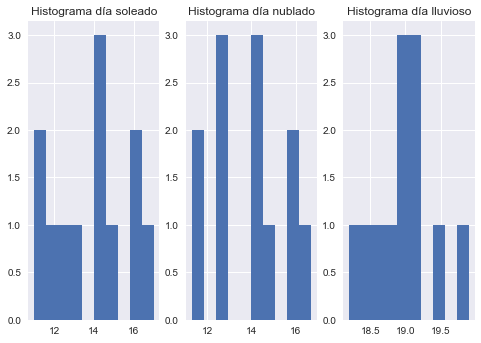

In [9]:
plt.figure()

plt.subplot(1,3,1)
plt.hist(tiempos_sol)
plt.title("Histograma día soleado")
#plt.savefig("Hist_Soleado", dpi = 300)

plt.subplot(1,3,2)
plt.hist(tiempos_nub)
plt.title("Histograma día nublado")
#plt.savefig("Hist_Nublado", dpi = 300)

plt.subplot(1,3,3)
plt.hist(tiempos_llu)
plt.title("Histograma día lluvioso")
#plt.savefig("Hist_Lluvioso", dpi = 300)
plt.savefig("Histogramas", dpi = 300)
plt.show()
plt.close()   # Terminar un gráfico


## Test
 
### Approach Nº1 - Series con distribuciones normales

#### Test de  Pearson (Tabla 2)


In [10]:
tituloCorrelacion = ["Serie", "Coef. de Correlación", "p-valor"]
testPearson = {}
testPearson["Sol - Lluvia"] = stats.pearsonr(tiempos_sol, tiempos_llu)
testPearson["Nublado - Lluvia"] = stats.pearsonr(tiempos_nub, tiempos_llu)
testPearson["Sol - Nublado"] = stats.pearsonr(tiempos_sol, tiempos_nub)
graficarTabla("Pearson", tituloCorrelacion, testPearson)


Test de  Pearson
Serie                | Coef. de Correlación | p-valor             
Sol - Lluvia         |   0.0525893206142193 |   0.8710570171791218
Nublado - Lluvia     |  0.04228906602480422 |    0.896177007833118
Sol - Nublado        |   0.9908237767557433 | 5.045646399806607e-10


#### Test de Muestras Apareadas (Tabla 3)


In [11]:
testApareadas = {}
testApareadas["Lluvia - Sol"] = stats.ttest_rel(tiempos_llu, tiempos_sol)
testApareadas["Lluvia - Nublado"] = stats.ttest_rel(tiempos_llu, tiempos_nub)
testApareadas["Sol - Nublado"] = stats.ttest_rel(tiempos_sol, tiempos_nub)
graficarTabla("Muestras Apareadas", tituloEstadistico, testApareadas)


Test de  Muestras Apareadas
Serie                | Estadistico          | p-valor             
Lluvia - Sol         |    8.576227572594302 | 3.3516511607218045e-06
Lluvia - Nublado     |    9.720128995157081 | 9.810399492877932e-07
Sol - Nublado        |   0.4121382498605874 |   0.6881556115604558


### Approach Nº2 - Series con distribuciones desconocida

#### Test de Wilcoxon (Tabla 4)


In [12]:
testWilcoxon = {}
testWilcoxon["Sol - Lluvia"] = stats.wilcoxon(tiempos_sol, tiempos_llu)
testWilcoxon["Nublado - Lluvia"] = stats.wilcoxon(tiempos_nub, tiempos_llu)
testWilcoxon["Sol - Nublado"] = stats.wilcoxon(tiempos_nub, tiempos_sol)
graficarTabla("Wilcoxon", tituloEstadistico, testWilcoxon)


Test de  Wilcoxon
Serie                | Estadistico          | p-valor             
Sol - Lluvia         |                  0.0 | 0.002217721464237049
Nublado - Lluvia     |                  0.0 | 0.002217721464237049
Sol - Nublado        |                 28.5 |   0.6882065030738291


#### Test de Permutaciones (Tabla 5)

p-valor: 0.0


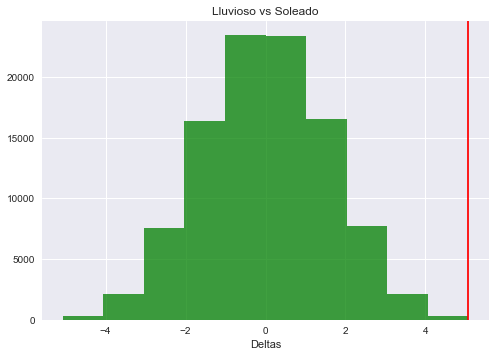

p-valor: 0.0


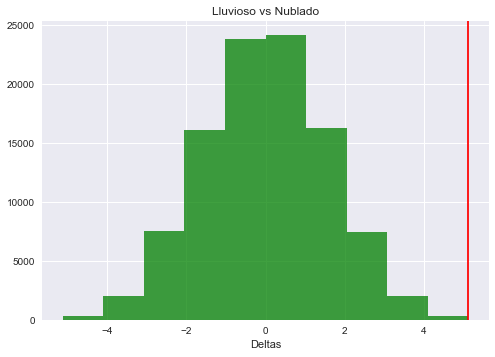

p-valor: 0.31109


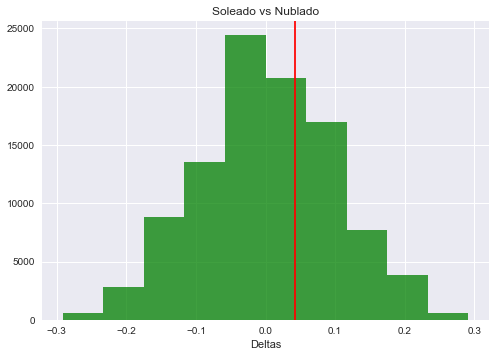

p-valor: 0.65513


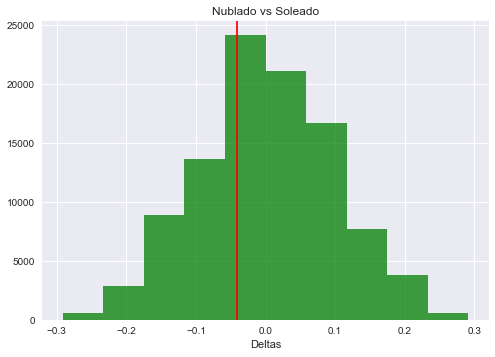

In [13]:
def test_permutacion(v1, v2, times, titulo):
    delta0 = np.mean(v1) - np.mean(v2)
    
    deltas = []
    p = 0
    for i in range(0, times):
        t1 = 0
        t2 = 0
        for tiempo in zip(v1, v2):
            r = random.random()
            if  r < 0.5:
                t1 += tiempo[0]
                t2 += tiempo[1]
            else:
                t1 += tiempo[1]
                t2 += tiempo[0]
        
        ndelta = t2/len(v2) - t1/len(v1) 
        deltas.insert(0, ndelta)
        if ndelta > delta0:
            p += 1

    pvalue = p / times
    
    print("p-valor: " + str(pvalue))

    
    plt.hist(deltas, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.axvline(delta0, color='r')
    plt.xlabel('Deltas')
    plt.title(titulo)
    plt.show()
    plt.savefig(titulo, dpi = 300)
    plt.close()

test_permutacion(tiempos_llu, tiempos_sol, 100000, "Lluvioso vs Soleado")
test_permutacion(tiempos_llu, tiempos_nub, 100000, "Lluvioso vs Nublado")
test_permutacion(tiempos_sol, tiempos_nub, 100000, "Soleado vs Nublado")
test_permutacion(tiempos_nub, tiempos_sol, 100000, "Nublado vs Soleado")
